<!--
 * @version:
 * @Author:  StevenJokess https://github.com/StevenJokess
 * @Date: 2021-02-04 20:30:32
 * @LastEditors:  StevenJokes https://github.com/StevenJokes
 * @LastEditTime: 2023-02-23 17:15:31
 * @Description:
 * @Help me: 如有帮助，请赞助，失业3年了。![支付宝收款码](https://github.com/StevenJokess/d2rl/blob/master/img/%E6%94%B6.jpg)
 * @TODO::
 * @Reference:https://github.com/StevenJokess/d2rl/blob/master/%E5%AE%9E%E9%AA%8C/%E7%AC%AC2%E7%AB%A0_%E5%A4%9A%E8%87%82%E8%80%81%E8%99%8E%E6%9C%BA%E9%97%AE%E9%A2%98.ipynb
-->

In [1]:
# 导入需要使用的库,其中numpy是支持数组和矩阵运算的科学计算库,而matplotlib是绘图库
import numpy as np
import matplotlib.pyplot as plt


class BernoulliBandit:
    """ 伯努利多臂老虎机,输入K表示拉杆个数 """
    def __init__(self, K):
        self.probs = np.random.uniform(size=K)  # 随机生成K个[0, 1）的数（默认参数：https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html），该数服从正态分布,作为拉动每根拉杆的回报
        # 概率
        self.best_idx = np.argmax(self.probs)  # 获奖概率最大的拉杆
        self.best_prob = self.probs[self.best_idx]  # 最大的获奖概率
        self.K = K

    def step(self, k):
        # 返回每步的奖励：当玩家选择了k号拉杆后,根据拉动该老虎机的k号拉杆获得奖励的概率返回1（获奖）或0（未
        # 获奖）其中，k是[0, K-1]范围的整数。0号杆就是第一个杆，以此类推。
        if np.random.rand() < self.probs[k]:  # 随机生成1个[0, 1）的数，该数服从 [0,1) 之间的均匀分布
            return 1
        else:
            return 0


np.random.seed(1)  # 设定随机种子,使实验具有可重复性

K = 10
bandit_10_arm = BernoulliBandit(K)
print("随机生成了一个%d臂伯努利老虎机" % K)
print("伯努利老虎机的各个臂的获奖概率是%a" % bandit_10_arm.probs)
print("获奖概率最大的拉杆为%d号,其获奖概率为%.4f" %
      (bandit_10_arm.best_idx, bandit_10_arm.best_prob))


k = 2
bandit_10_arm_step2= bandit_10_arm.step(k)


print("伯努利老虎机的第%d步是否获奖？1（获奖）或0（未获奖）：%d" % (k, bandit_10_arm_step2))

# ---
# 随机生成了一个10臂伯努利老虎机
# 伯努利老虎机的各个臂的获奖概率是array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
#      1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
#      3.96767474e-01, 5.38816734e-01])
# 获奖概率最大的拉杆为1号,其获奖概率为0.7203
# 选择伯努利老虎机第%d号拉杆是否获奖？1（获奖）或0（未获奖）：0

随机生成了一个10臂伯努利老虎机
伯努利老虎机的各个臂的获奖概率是array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])
获奖概率最大的拉杆为1号,其获奖概率为0.7203
伯努利老虎机的第2步是否获奖？1（获奖）或0（未获奖）：0


In [2]:
class Solver:
    """ 多臂老虎机算法基本框架 """
    def __init__(self, bandit):
        self.bandit = bandit # bandit是输入的BernoulliBandit(K)
        self.counts = np.zeros(self.bandit.K)  # 创造一个一维数组，数组的idx代表几号杆，而元素代表该拉杆的尝试次数
        self.regret = 0.  # 当前步的累积懊悔
        self.actions = []  # 维护一个列表,记录每一步的动作，最后长度是步数
        self.regrets = []  # 维护一个列表,记录每一步的累计懊悔，最后长度是步数

    def update_regret(self, k):
        # 计算累积懊悔并保存，保存是为了最后优化要最小化累计懊悔, k为本次动作选择的拉杆的编号
        self.regret += self.bandit.best_prob - self.bandit.probs[k]
        self.regrets.append(self.regret) # 记录下当前的累计懊悔到regrets表

    def run_one_step(self):
        # 返回当前动作选择哪一根拉杆, 由每个具体的策略实现
        raise NotImplementedError # 还没写呢，下面会介绍各个策略，EpsilonGreddy、EpsilonGreedy就会在继承基础下增加实现

    def run(self, num_steps):
        # 是主循环，运行一定次数,num_steps为总运行次数
        for _ in range(num_steps):
            k = self.run_one_step() # 策略决定动作，即选哪个编号摇杆
            self.counts[k] += 1 # 将编号k的尝试次数在原基础上+1
            self.actions.append(k) # 将选择了哪个编号的拉杆加入动作列表
            self.update_regret(k) # 按步更新累计懊悔

一段使用 epsilon-greedy 策略进行动作选择的 Python 代码示例 （by ChatGPT）

```
import random
def epsilon_greedy(Q, state, epsilon, n_actions):
    if random.random() < epsilon:
        # 探索，随机选择动作
        action = random.randint(0, n_actions-1)
    else:
        # 利用，选择价值最高的动作
        action = max(list(range(n_actions)), key=lambda a: Q[state][a])
    return action
```
该函数接受四个参数：

- `Q`: 一个2维数组，里面的元素表示各个状态-动作对的价值估计。Q[state][a]
- `state`: 当前状态。
- `epsilon`: 探索的概率。
- `n_actions`: 动作数量。

对比（by ChatGPT)：
- `random.randint(a, b)`用于生成一个随机整数，范围在 [a, b] 之间（包括两端的值）。在这个例子中，`n_actions` 表示可选动作的数量，由于 Python 的索引从 0 开始，所以动作的索引范围是从 0 到 `n_actions-1`。因此，`random.randint(0, n_actions-1)` 会生成一个介于 0 和 `n_actions - 1` 之间的随机整数，用作 epsilon-greedy 策略在探索时选择的动作索引。
- `np.random.randin(low, high=None, size=None, dtype=int)`其中，low 表示生成的随机整数范围的下界（包含在范围内），high 表示生成的随机整数范围的上界（不包含在范围内）。size 是一个表示生成的随机整数数组的形状的元组，如果不指定则默认为一个标量。dtype 是生成的随机整数数组的数据类型，如果不指定则默认为 int。`np.random.randin(a, b)`是生成[a, b)之间的整数。所以下面的self.bandit.K不用减一。

在函数内部，首先以概率 epsilon 进行探索，随机选择一个动作；否则，选择当前状态下价值最高的动作。函数返回所选动作的索引。

---

`max(list(range(n_actions)), key=lambda a: Q[state][a])`

在这段代码中，`max` 函数用于从一组数中找到最大值，并返回其索引。具体而言，`list(range(n_actions))` 用于生成一个包含从 0 到 `n_actions-1` 的整数的列表，然后 `max` 函数根据每个整数在 `Q[state]` 中的价值进行比较，找到具有最大价值的动作，并返回其索引。

`max` 函数的第二个参数 `key` 是一个函数，用于指定在比较两个元素时应该使用的关键字。在这个例子中，`key=lambda a: Q[state][a]` 指定了以动作价值作为关键字进行比较。具体而言，对于每个动作 a，lambda a: Q[state][a] 返回状态 state 下动作 a 的价值。max 函数在比较动作时，会将每个动作作为 key 函数的输入，获取其价值并进行比较，最终找到具有最大价值的动作并返回其索引。





In [3]:
class EpsilonGreedy(Solver):
    """ epsilon贪婪算法,继承Solver类 """
    def __init__(self, bandit, epsilon=0.01, init_prob=1.0): # init_prob 表示最初的采样概率是1，就是一开始完全随机
        super(EpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon
        #初始化拉动所有拉杆的价值估计，生成K个元素的array
        self.estimates = np.array([init_prob] * self.bandit.K) # 即上面的Q，是一个一维数组 

    def run_one_step(self):
        if np.random.random() < self.epsilon: # 随机采样的概率：$\epsilon$
            k = np.random.randint(0, self.bandit.K)  # 随机选择第k根拉杆
        else:                   # 采样概率：$1-\epsilon$
            k = np.argmax(self.estimates)  # 选择原本期望回报估值最大的拉杆
        r = self.bandit.step(k)  # 得到本次动作的回报
        self.estimates[k] += 1 / (self.counts[k] + 1) * (r - self.estimates[k]) # 增量式更新期望奖励的估值；self.counts[k] + 1是在更新该杆的计数器
        return k # 输出k，之后会传递到该类所继承的`Solver`类下的`run`函数

epsilon_greedy_solver = EpsilonGreedy(bandit_10_arm, epsilon=0.01)

ChatGPT:
`np.argmax` is a function from the NumPy library in Python that returns the indices of the maximum values along an axis in an array. It takes an array as its input and an optional argument axis, which specifies the axis along which to find the maximum value.

Here's an example:

```
import numpy as np

# create a 2D array
a = np.array([[1, 2, 3], [4, 5, 6]])

# find the index of the maximum value along axis 0
max_index = np.argmax(a, axis=0)

print(max_index)  # Output: [1 1 1]
```

In the above example, np.argmax(a, axis=0) returns an array [1, 1, 1], which means that the maximum value in the first column of the array is at index 1, the maximum value in the second column is at index 1, and the maximum value in the third column is at index 1.

epsilon-贪婪算法的累积懊悔为： 25.526630933945313


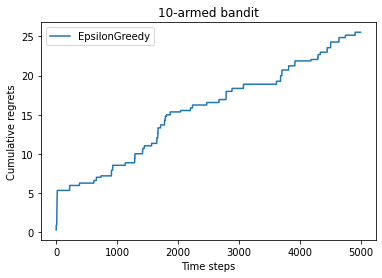

In [4]:
def plot_results(solvers, solver_names):
    """生成累计懊悔随时间变化的图像。输入solvers是一个包括很多元素是`Solver`类的实例的列表,该列表中的每个元素(`Solver`类的实例)是一种特定的策略下的。
    而solver_names也是一个列表,存储每个策略的名称"""
    for idx, solver in enumerate(solvers): # 会依次遍历solvers列表中的元素，并将每个元素分别赋值给solver变量。同时，还会使用enumerate()函数给每个元素附上一个序号，序号从0开始逐渐递增，序号会被赋值给idx变量。
        time_list = range(len(solver.regrets)) # 生成整数序列[0. 1, 2， ...，len(solver.regrets) - 1 ]
        plt.plot(time_list, solver.regrets, label=solver_names[idx]) 
    plt.xlabel('Time steps') # X轴为时间步
    plt.ylabel('Cumulative regrets') # Y轴为累积懊悔
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    plt.legend() # 用于添加图例，默认会使用 `label` 参数设置的标签来创建图例。
    plt.show()


np.random.seed(1)
epsilon_greedy_solver = EpsilonGreedy(bandit_10_arm, epsilon=0.01) # 创建EpsilonGreedy类的一个实例
epsilon_greedy_solver.run(5000) # 5000次运行
print('epsilon-贪婪算法的累积懊悔为：', epsilon_greedy_solver.regret)
plot_results([epsilon_greedy_solver], ["EpsilonGreedy"]) # 只有一个`Solver`类的实例，idx只能取0，即第一个元素的EpsilonGreedy

# epsilon-贪婪算法的累积懊悔为：25.526630933945313

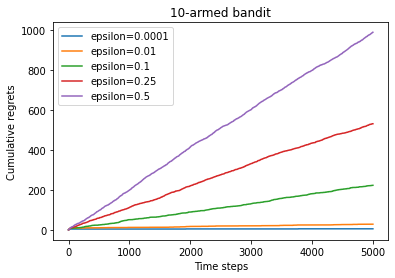

In [5]:
np.random.seed(0) # seed从1变成0.
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5] # 尝试不同的epsilon
epsilon_greedy_solver_list = [
    EpsilonGreedy(bandit_10_arm, epsilon=e) for e in epsilons
] # 每个元素是一种特定的策略下的。其idx对应的就是各个epsilon

epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons] # 生成epsilon表，为后面标签名做准备
for solver in epsilon_greedy_solver_list: # 遍历列表里里的实例
    solver.run(5000) # 去运行

plot_results(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

epsilon值衰减的贪婪算法的累积懊悔为： 10.114334931260183


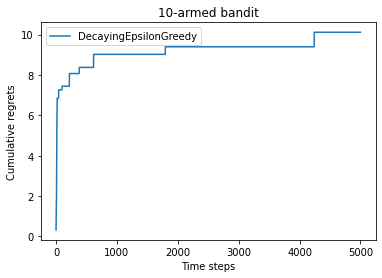

In [6]:
class DecayingEpsilonGreedy(Solver):
    """ epsilon值随时间衰减的epsilon-贪婪算法,继承Solver类 """
    def __init__(self, bandit, init_prob=1.0):
        super(DecayingEpsilonGreedy, self).__init__(bandit)
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.total_count = 0 # total_count 代表时间

    def run_one_step(self):
        self.total_count += 1
        if np.random.random() < 1 / self.total_count:  # epsilon值随时间衰减，不需要用"1."因为"/"是浮点除
            k = np.random.randint(0, self.bandit.K)
        else:
            k = np.argmax(self.estimates)

        r = self.bandit.step(k)
        self.estimates[k] += 1 / (self.counts[k] + 1) * (r - self.estimates[k])
        return k


np.random.seed(1)
decaying_epsilon_greedy_solver = DecayingEpsilonGreedy(bandit_10_arm)
decaying_epsilon_greedy_solver.run(5000)
print('epsilon值衰减的贪婪算法的累积懊悔为：', decaying_epsilon_greedy_solver.regret)
plot_results([decaying_epsilon_greedy_solver], ["DecayingEpsilonGreedy"])

# epsilon值衰减的贪婪算法的累积懊悔为：10.114334931260183

上置信界算法的累积懊悔为： 70.45281214197854


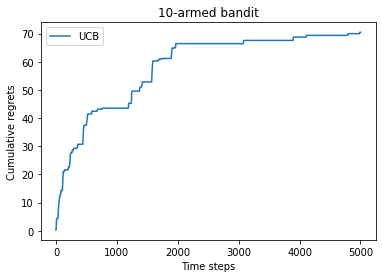

In [7]:
class UCB(Solver):
    """ UCB算法,继承Solver类 """
    def __init__(self, bandit, coef, init_prob=1.0):
        super(UCB, self).__init__(bandit)
        self.total_count = 0
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.coef = coef

    def run_one_step(self):
        self.total_count += 1
        ucb = self.estimates + self.coef * np.sqrt(
            np.log(self.total_count) / (2 * (self.counts + 1)))  # 计算上置信界
        k = np.argmax(ucb)  # 选出上置信界最大的拉杆
        r = self.bandit.step(k)
        self.estimates[k] += 1. / (self.counts[k] + 1) * (r - self.estimates[k])
        return k


np.random.seed(1)
coef = 1  # 控制不确定性比重的系数
UCB_solver = UCB(bandit_10_arm, coef)
UCB_solver.run(5000)
print('上置信界算法的累积懊悔为：', UCB_solver.regret)
plot_results([UCB_solver], ["UCB"])

# 上置信界算法的累积懊悔为： 70.45281214197854

汤普森采样算法的累积懊悔为： 57.19161964443925


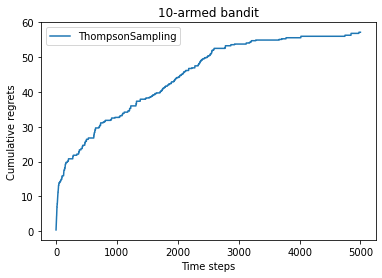

In [8]:
class ThompsonSampling(Solver):
    """ 汤普森采样算法,继承Solver类 """
    def __init__(self, bandit):
        super(ThompsonSampling, self).__init__(bandit)
        self._a = np.ones(self.bandit.K)  # 列表,_a[]表示每根拉杆奖励为1的次数$m_1$
        self._b = np.ones(self.bandit.K)  # 列表,_b[]表示每根拉杆奖励为0的次数$m_2$

    def run_one_step(self):
        samples = np.random.beta(self._a, self._b)  # 按照Beta分布采样一组奖励样本
        k = np.argmax(samples)  # 选出采样奖励最大的拉杆
        r = self.bandit.step(k)

        # 下面加了新的试验数据，随机变量_a[k]和_b[k]仍服从beta分布，这点利用了beta分布的共轭性，详见beta分布.md
        self._a[k] += r  # 更新Beta分布的第一个参数，成功数，
        self._b[k] += (1 - r)  # 更新Beta分布的第二个参数，失败数，
        return k


np.random.seed(1)
thompson_sampling_solver = ThompsonSampling(bandit_10_arm)
thompson_sampling_solver.run(5000)
print('汤普森采样算法的累积懊悔为：', thompson_sampling_solver.regret)
plot_results([thompson_sampling_solver], ["ThompsonSampling"])

# 汤普森采样算法的累积懊悔为：57.19161964443925

---

对于参数 $(m_1+1，m_2+1）$ 的 **Beta 分布**[1]，拉杆的回报r，有概率函数：

$$f(r;m_1+1,m_2+1\} = \frac{r^{m_1}(1-r)^{m_2}}{B(m_1+1,m_2+1)}$$

其中 $B(m_1+1,m_2+1)$ 是 $Beta$ 函数，
得如下式子[2]：

$$
\mathrm{Beta}(m_1+1, m_2+1) = \frac{(m_1) !(m_2) !}{(m_1+m_2+1) !}
$$

---

更多beta分布知识，见[beta分布](../math/beta分布.md)